In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
#Importamos nuestros módulos y clases necesarias
import Image_Classifier as img_clf
import Labeled_Image as li
import classifiers as clfs

from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rescale

In [2]:
from IPython.display import display
import fileupload
import os
import PIL.Image
import io as io2
import numpy as np


'''Función mediante la que indicamos el clasificador
con el que clasificaremos la imagen'''
def set_classifier_wrapper(classifier_index):
    clf.set_classifier(clfs.classifiers[classifier_index][0],
                       is_probs_classifier = clfs.classifiers[classifier_index][1])
    
'''Función que nos permite mostrar la imagen'''
def plotter_wrapper(probs):
    lbl_img.boxes_generator_with_nms(probs)
    lbl_img.plotter()

''' Función mediante la que escogemos la imagen'''
def _upload(lbl_img):

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        ch = change['owner']
        image = io2.BytesIO(ch.data)
        image = PIL.Image.open(image)
        image = np.array(image)
        image = rgb2gray(image)
        lbl_img.set_image(image)
        
    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

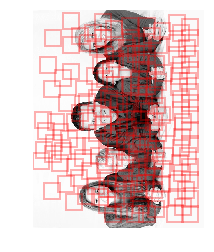

In [3]:
# Inicializamos la clase que se encarga de clasificar imagenes 
clf = img_clf.Image_Classifier(clfs.classifiers.get('svm'),62,47)
lbl_img = li.Labeled_Image(clf)

# Mostramos el widget que permita elegir el clasificador
interact_manual(set_classifier_wrapper, classifier_index = list(clfs.classifiers.keys()));

# Mostramos el widget que permita elegir la imagen a clasificar
_upload(lbl_img)

# Por ultimo, mostramos la imagen y permitimos que muestre las ventanas 
# en función de las probabilidades
interact_manual(plotter_wrapper, probs=(0.5,1,0.001))